# Curve Fitting with NumPy

We have a dataset where each data point contains measurements of two variables, and we wish to describe as exactly as possible what the relationship between the variables is.  That is, we'd like to find an equation that describes the relationship.  Often, we suspect they are *linearly* related.  If so, we will have an equation of the form $y=mx+b$, and our task is to find $m$ and $b$.

First of all, let's draw a plot to see what it looks like:

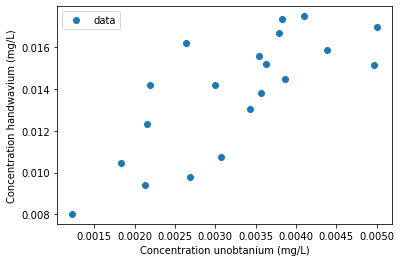

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

C_unob = []
C_hand = []

with open('unob-vs-hand.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for line in reader:
        C_unob.append(float(line['Concentration unobtanium (mg/L)']))
        C_hand.append(float(line['Concentration handwavium (mg/L)']))

plt.plot(C_unob, C_hand, 'o', label='data')
plt.xlabel('Concentration unobtanium (mg/L)')
plt.ylabel('Concentration handwavium (mg/L)')
plt.legend()
plt.show()

That's pretty noisy data, but certainly it seems that it is increasing; if there is more unobtanium, there is more handwavium.  

By eye, we might guess than a line through $(0.0015, 0.009)$ and $(0.005, 0.017)$ would be a pretty good fit.  



Let's add that to the plot:

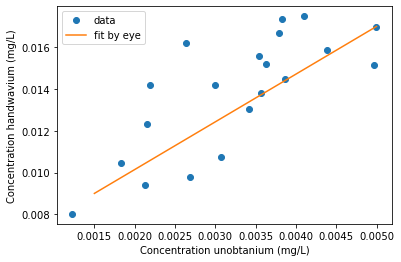

In [2]:
pt0 = [0.0015, 0.009] # x- and y-coordinates of first point
pt1 = [0.005, 0.017]  # x- and y-coordinates of second point
plt.plot(C_unob, C_hand, 'o', label='data')
plt.plot([pt0[0], pt1[0]], [pt0[1], pt1[1]], label='fit by eye')
plt.xlabel('Concentration unobtanium (mg/L)')
plt.ylabel('Concentration handwavium (mg/L)')
plt.legend()
plt.show()

So by eye, that line seems to go pretty well up the middle of the data.
Using the equation of a line, $y=mx+b$:

* from the point $(x_0, y_0) = (0.0015, 0.009)$ we get $0.009 = m0.0015 + b$.
* from the point $(x_1, y_1) = (0.005, 0.017)$ we get $0.017 = m0.005 + b$.

We can solve these two equations for $m$ and $b$, giving:

In [3]:
m = (pt1[1] - pt0[1]) / (pt1[0] - pt0[0])
print("Slope is something like: {}".format(m))

b = pt0[1] - m * pt0[0]
print("y-intercept is something like: {}".format(b))

Slope is something like: 2.285714285714286
y-intercept is something like: 0.00557142857142857


By hand, we can get a reasonable number.  But computers can do better.

---

The line is very close to some data points, but farther away from others.  We want to find the values of $m$ and $b$ so that the line is as close as possible to all the points.  The function 
[numpy.polynomial.Polynomial.fit](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfit.html)
will fit a polynomial of any degree to a set of datapoints.

A polynomial of degree $d$ is a function $f(x)$ of the form:
$$f(x) = c_0 + c_1x + c_2x^2 + c_3x^3 + \dots c_d x^d$$

The coefficients $c_0, c_1, c_2, \dots, c_d$ fully describe a particular polynomial.

Here we want a linear function, so we use $d=1$.  Then our polynomial will be of the form:
$$f(x) = c_0 + c_1x$$

To avoid numerical issues, the fit function does not simply return an array of numbers representing the coefficients.  It does various clever things instead.  For our purposes, we just want an array containing the coefficients, but we can easily convert, as follows.

In [4]:
pfit = np.polynomial.Polynomial.fit(C_unob, C_hand, 1)
## pfit is a np.polynomial.Polynomial object.

coefs = pfit.convert().coef
## coefs is just a np.ndarray containing c_0, c_1, and so on.
## For this example, there are just two values: b, and m.
print(coefs)
print("Slope is something like: {}".format(coefs[1]))
print("y-intercept is something like: {}".format(coefs[0]))

[0.00697606 2.11379306]
Slope is something like: 2.113793055328451
y-intercept is something like: 0.006976062734012573


Now that we have a linear "best fit", let's see how that compares to the guess we made by eye:

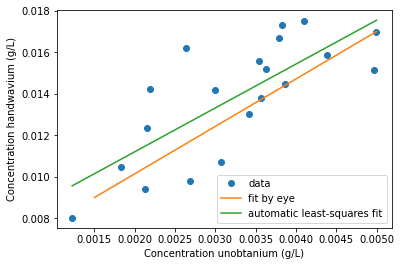

In [5]:
fitx = np.array([min(C_unob), max(C_unob)])
fity = coefs[0] + coefs[1] * fitx

plt.plot(C_unob, C_hand, 'o', label='data')
plt.plot([pt0[0], pt1[0]], [pt0[1], pt1[1]], label='fit by eye')
plt.plot(fitx, fity, label='automatic least-squares fit')
plt.xlabel('Concentration unobtanium (g/L)')
plt.ylabel('Concentration handwavium (g/L)')
plt.legend()
plt.show()

The computer result seems reasonable.

In the same way, we can fit a higher order polynomial, simply by passing a different order to `np.polynomial.Polynomial.fit`.  Here we fit a quadradic (degree=2) to the same data:

[ 2.69125548e-03  5.09060351e+00 -4.66351052e+02]


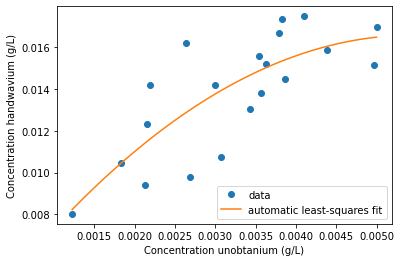

In [6]:
pfit = np.polynomial.Polynomial.fit(C_unob, C_hand, 2)
coefs = pfit.convert().coef
print(coefs)
fitx = np.linspace(min(C_unob), max(C_unob), 100)

plt.plot(C_unob, C_hand, 'o', label='data')
plt.plot(fitx, coefs[0] + coefs[1] * fitx + coefs[2] * fitx**2, 
         label='automatic least-squares fit')
plt.xlabel('Concentration unobtanium (g/L)')
plt.ylabel('Concentration handwavium (g/L)')
plt.legend()
plt.show()

Is that a better fit?

The error *is* smaller, but the equation is more complicated; it might be difficult to explain *why* this relationship might be quadratic.

Don't arbitrarily use higher order fits.  The computer can always find a good fit; if the polynomial has the same degree as the number of points, the error can be zero.  But that doesn't necessarily mean it is a good fit.  Look at the following disaster: the polynomial fits perfectly through all 20 points:

[ 1.00873494e+11 -6.11743373e+14  1.69742958e+18 -2.83225050e+21
  3.11727989e+24 -2.28923963e+27  9.97786423e+29 -4.17697898e+31
 -3.16467173e+35  2.88697393e+38 -1.58042988e+41  6.27667914e+43
 -1.91101411e+46  4.54865251e+48 -8.49378343e+50  1.23491171e+53
 -1.37221125e+55  1.12710019e+57 -6.45418446e+58  2.30181832e+60
 -3.85079227e+61]


/srv/jupyter_python3-extras/lib/python3.7/site-packages/numpy/polynomial/polynomial.py:1350: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


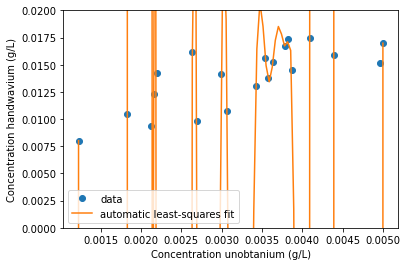

In [7]:
pfit = np.polynomial.Polynomial.fit(C_unob, C_hand, 20)
coefs = pfit.convert().coef
print(coefs)
fitx = np.linspace(min(C_unob), max(C_unob), 100)

plt.plot(C_unob, C_hand, 'o', label='data')
plt.plot(fitx, pfit(fitx),
         label='automatic least-squares fit')
plt.xlabel('Concentration unobtanium (g/L)')
plt.ylabel('Concentration handwavium (g/L)')
plt.legend()
plt.ylim(0, 0.02)
plt.show()

This polynomial fits the data perfectly, but it explains nothing.  The data is *overfit*.

We're not going to go into details of how to select a fit size here. **For the purposes of this course we will tell you what degree to use.**